In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import os

# load data

In [23]:
# import zipfile

# # Download zip file of 10_food_classes images
# # See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [24]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

# visulazation dataset

In [25]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [26]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [27]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


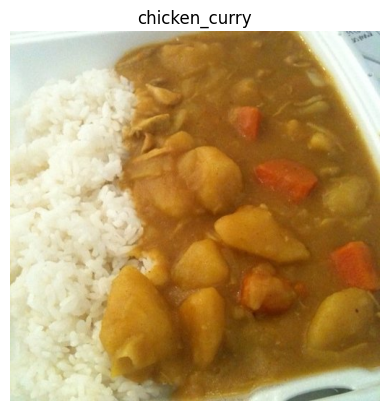

In [28]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

# preprocessing

In [29]:
# apple normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [30]:
train_data=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True

)
test_data=test_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [31]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [32]:
images

array([[[[0.7725491 , 0.6784314 , 0.5764706 ],
         [0.79215693, 0.6901961 , 0.6       ],
         [0.7843138 , 0.68235296, 0.5921569 ],
         ...,
         [0.454902  , 0.28235295, 0.23137257],
         [0.46274513, 0.29411766, 0.23137257],
         [0.45098042, 0.28235295, 0.21960786]],

        [[0.7725491 , 0.6784314 , 0.58431375],
         [0.78823537, 0.6862745 , 0.59607846],
         [0.8117648 , 0.7058824 , 0.62352943],
         ...,
         [0.47450984, 0.30588236, 0.24313727],
         [0.44705886, 0.2784314 , 0.21568629],
         [0.48627454, 0.31764707, 0.25490198]],

        [[0.7843138 , 0.6862745 , 0.6       ],
         [0.8117648 , 0.7058824 , 0.62352943],
         [0.8117648 , 0.7058824 , 0.62352943],
         ...,
         [0.41176474, 0.2509804 , 0.17254902],
         [0.46274513, 0.3019608 , 0.23137257],
         [0.48235297, 0.32156864, 0.2509804 ]],

        ...,

        [[0.69411767, 0.6       , 0.4901961 ],
         [0.7137255 , 0.61960787, 0.50980395]

In [33]:
print(images.shape)
print(labels.shape)

# iamge in zero index
print(images[0].shape)

(32, 224, 224, 3)
(32, 10)
(224, 224, 3)


# Create a model

In [34]:
from tensorflow.keras.models import Sequential


In [35]:
model=Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# compiler the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# fit the model

In [37]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(235, 235)

In [38]:
history=model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 180ms/step - accuracy: 0.1528 - loss: 2.2565 - val_accuracy: 0.2888 - val_loss: 1.9772
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 74s 155ms/step - accuracy: 0.3081 - loss: 1.9584 - val_accuracy: 0.4047 - val_loss: 1.7665
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 168ms/step - accuracy: 0.4041 - loss: 1.7671 - val_accuracy: 0.4844 - val_loss: 1.5725
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.4884 - loss: 1.5204 - val_accuracy: 0.6147 - val_loss: 1.2145
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.5972 - loss: 1.2121 - val_accuracy: 0.7532 - val_loss: 0.8664


# Evaluate the model

<Axes: >

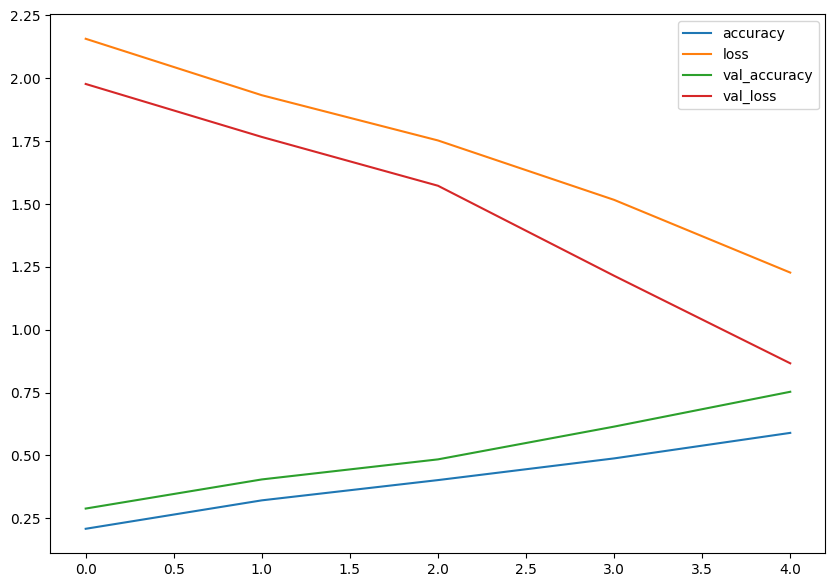

In [39]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        78,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,532 (943.49 KB)

 Trainable params: 80,510 (314.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 161,022 (629.00 KB)

# Making a prediction with our trained model

In [42]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [43]:
# If you're using Google Colab, you could also upload some of your own images via the files tab.

# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [44]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [45]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


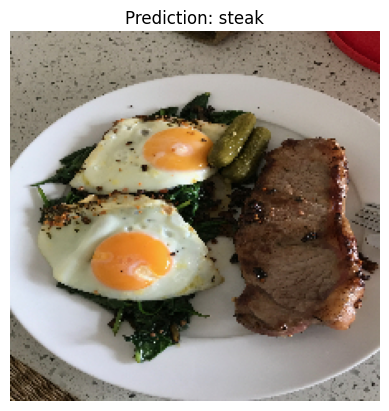

In [49]:
pred_and_plot(model=model,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


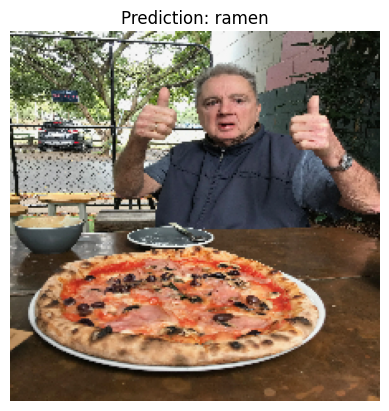

In [46]:
pred_and_plot(model, "03-pizza-dad.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


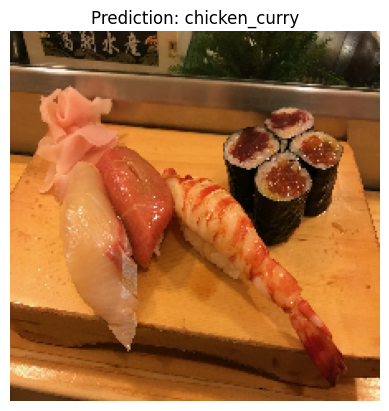

In [48]:
pred_and_plot(model, "03-sushi.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


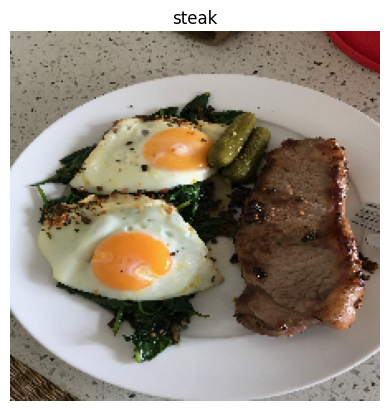

In [51]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


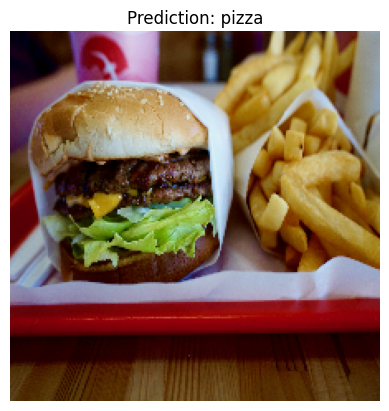

In [52]:
pred_and_plot(model, "03-hamburger.jpeg", class_names)

# Saving and loading our model

In [54]:
# Save a model
model.save("saved_trained_model.keras")

In [56]:
# Load in a model and evaluate it
loaded_model = tf.keras.models.load_model("saved_trained_model.keras")
loaded_model.evaluate(test_data)

235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.7468 - loss: 0.8746


[0.8663945198059082, 0.7531999945640564]